In [1]:
# !pip install pydot
# !pip install wandb
# Get helper_functions.py script from course GitHub
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

2022-11-12 16:48:02.130937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-12 16:48:02.130978: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import wandb
wandb.tensorboard.patch(root_logdir="logs")
wandb.init(project="food_v1", sync_tensorboard=True)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /home/anhduc/.netrc


In [3]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

In [4]:
tf.config.list_physical_devices()

2022-11-12 16:49:15.994515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-12 16:49:15.994597: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-12 16:49:15.994646: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Canada-2024): /proc/driver/nvidia/version does not exist


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
!ls data/model_test_images/

abutment  alternator  test  train


## Create train/test 

In [4]:
!mkdir data/model_test_images/train
!mkdir data/model_test_images/test

mkdir: cannot create directory ‘data/model_test_images/train’: File exists
mkdir: cannot create directory ‘data/model_test_images/test’: File exists


In [6]:
import os
for dirs, sub_dirs, files in os.walk("data/model_test_images/"):
    print(dirs)
    print(sub_dirs)
    print(files)

data/model_test_images/
['abutment', 'alternator', 'test', 'train']
[]
data/model_test_images/abutment
[]
['47563706_ffe6fbefc3.jpg', '935410441_b9083f6ef3.jpg', '2776508407_1fe807f53a.jpg', '2447660499_9da210ef11.jpg', '2447660471_b19bdb910b.jpg', '92766458_ab9c0d18df.jpg', '315625810_f65f776cf1.jpg', '2919956213_3634ce3cba.jpg', '321711756_6022e72426.jpg', '246687783_164f9fc7ab.jpg', '2586827913_1f0f2750b0.jpg', '528017850_2ed9829747.jpg', '289010302_fa8076b6cc.jpg', '2758268383_cfa2e1d7e4.jpg', '2985169574_7e7edcc98c.jpg', '2348577334_155af177c8.jpg', '1026568654_e1e64b3ad4.jpg', '2661810388_8a2fc960d3.jpg', '2186537898_f2a96d48fc.jpg', '235904543_13c06b62eb_o.jpg', '418152134_6d89da684a.jpg', '135622703_b4a7215a0b.jpg', '2179861791_97f3422f2c.jpg', '3104837405_2d87b9ec90.jpg', '2548844289_c5a3c9496e.jpg', '3451095083_622be10e78.jpg', '842943998_5f075b5d82.jpg', '47563705_63649f916f.jpg', '89781378_aa05fa4903.jpg', '160567759_cfb8f795c5_o.jpg', '442992399_2eb906acc8.jpg', '120762530

In [7]:
target_dirs = os.listdir("data/model_test_images")
target_dirs

['abutment', 'alternator', 'test', 'train']

In [8]:
import random
def create_train_test_list(target_dir):
    random.seed(42)
    image_list = [os.path.join(target_dir, img_path) for img_path in os.listdir(target_dir)]
    train_split = int(0.8 * len(image_list))
    train_image_list = random.sample(image_list, train_split)
    test_image_list = list(set(image_list).difference(set(train_image_list)))
    return train_image_list, test_image_list

train_image_list, test_image_list = create_train_test_list("data/model_test_images/alternator")
len(train_image_list), len(test_image_list)

(45, 12)

In [9]:
def copy_images_to_file(img_path_list, target_dir, train=True):
        if train:
            split_dir = "train"
        else:
            split_dir = "test"

        # Copy images 
        for image_path in img_path_list:
            image_file_name = os.path.split(image_path)[-1]
            dest_path = os.path.join(target_dir, split_dir, image_dir, image_file_name)
            print(f"Copying: {image_path} to {dest_path}")
            copy2(image_path, dest_path)

In [10]:
# Create a function to move images
from shutil import copy2 
data_dir = "data/model_test_images"
target_dir = "data/model_test_images_split"
for image_dir in os.listdir(data_dir):
    for split_dir in ["train", "test"]:
        os.makedirs(os.path.join(target_dir, split_dir, image_dir), exist_ok=True)

    # Make training and test lists of target images
    train_image_list, test_image_list = create_train_test_list(os.path.join(data_dir, image_dir))

    # Copy training images
    copy_images_to_file(img_path_list=train_image_list, 
                        target_dir=target_dir, 
                        train=True)

    # Copy testing images
    copy_images_to_file(img_path_list=test_image_list, 
                        target_dir=target_dir, 
                        train=False)

Copying: data/model_test_images/abutment/1025726331_532f9ceb24.jpg to data/model_test_images_split/train/abutment/1025726331_532f9ceb24.jpg
Copying: data/model_test_images/abutment/2919956213_3634ce3cba.jpg to data/model_test_images_split/train/abutment/2919956213_3634ce3cba.jpg
Copying: data/model_test_images/abutment/935410441_b9083f6ef3.jpg to data/model_test_images_split/train/abutment/935410441_b9083f6ef3.jpg
Copying: data/model_test_images/abutment/1025722621_f6fdd16b9c.jpg to data/model_test_images_split/train/abutment/1025722621_f6fdd16b9c.jpg
Copying: data/model_test_images/abutment/2661810388_8a2fc960d3.jpg to data/model_test_images_split/train/abutment/2661810388_8a2fc960d3.jpg
Copying: data/model_test_images/abutment/2348577334_155af177c8.jpg to data/model_test_images_split/train/abutment/2348577334_155af177c8.jpg
Copying: data/model_test_images/abutment/2985169574_7e7edcc98c.jpg to data/model_test_images_split/train/abutment/2985169574_7e7edcc98c.jpg
Copying: data/model_te

In [ ]:
# Next 
# Make model datasets from train/test folders
# Build a model on train/test datasets
# Evaluate model
# Convert model to tflite for deployment...

## Load data

In [11]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

In [12]:
train_dir = "data/train"
test_dir = "data/test"
train_dir, test_dir

('data/train', 'data/test')

In [13]:
ls data/train 

food_images/  non_food_images/


In [ ]:
l

In [14]:
total_samples = len(os.listdir(train_dir))
num_food_samples = len(os.listdir(os.path.join(train_dir, "food_images")))
num_non_food_samples = len(os.listdir(os.path.join(train_dir, "non_food_images")))
total_samples, num_food_samples, num_non_food_samples

(2, 2428, 41114)

In [26]:
(1 / num_food_samples) * (total_samples / 2.0), (1 / num_non_food_samples) * (total_samples / 2.0)

(0.00041186161449752884, 0.0004122477147047936)

In [27]:
# Since we have a data imabalance let's get class weights

# See: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / num_food_samples) * (total_samples / 2.0)
weight_for_1 = (1 / (num_non_food_samples)) * (total_samples / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f'Weight for class 0: {weight_for_0}')
print(f'Weight for class 1: {weight_for_1}')

Weight for class 0: 0.00041186161449752884
Weight for class 1: 0.0004122477147047936


In [28]:
# Load in data
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
    batch_size=32,
    image_size=(224, 224)
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
    batch_size=32,
    image_size=(224, 224)
)

train_data, test_data

Found 43400 files belonging to 2 classes.


2022-11-12 16:55:18.971818: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 10519 files belonging to 2 classes.


(<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>)

In [29]:
len(train_data)

1357

In [30]:
train_data.class_names

['food_images', 'non_food_images']

In [31]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)

## Build the first model

In [32]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Make model untrainable 
base_model.trainable = False

# Build a functional model
input_layer = tf.keras.Input(shape=(224, 224, 3))
x = base_model(input_layer)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Construct model
model_1 = tf.keras.Model(input_layer, output_layer, name="EfficientNetB0-V1")

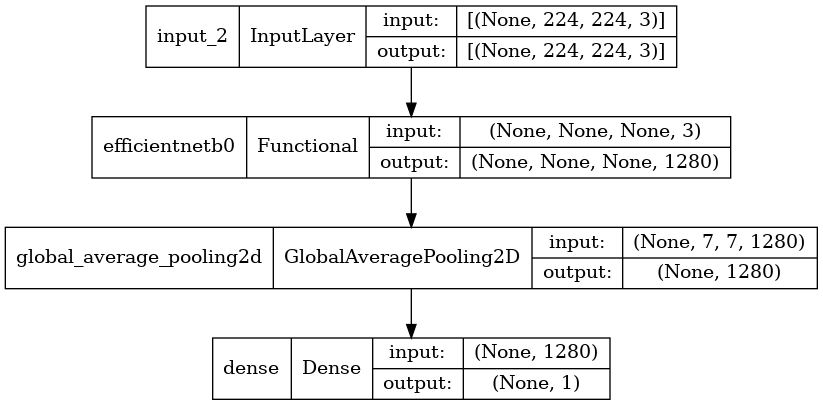

In [33]:
tf.keras.utils.plot_model(model_1, show_shapes=True)


In [34]:
# Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [35]:
# Create EarlyStopping callback and TensorBoard callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,
    monitor="val_loss"
)

In [36]:
# Fit model
import wandb
# wandb.tensorboard.patch(root_logdir="logs")
wandb.init(project="100k-livestream-video", sync_tensorboard=True)
history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=test_data,
                        callbacks=[early_stopping,
                                   create_tensorboard_callback("logs", model_1.name)],
                        class_weight=class_weight) # adjust for different numbers of classes...

Saving TensorBoard log files to: logs/EfficientNetB0-V1/20221112-165645


/home/anhduc/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5


2022-11-12 16:57:16.504094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-12 16:57:16.504146: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


  53/1357 [>.............................] - ETA: 1:17:46 - loss: 1.5141e-04 - accuracy: 0.8697

In [ ]:
model_1.evaluate(test_data)

In [ ]:
len(os.listdir("data/train/food_images/")), len(os.listdir("data/train/non_food_images/"))

## Save Model

In [ ]:
model_1.save("food_not_food_model_v1")

## Convert Model to TFLite for Deployment

In [ ]:
# Convert the model
saved_model_dir = "food_not_food_model_v1"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('food_not_food_model_v1.tflite', 'wb') as f:
  f.write(tflite_model)

## Test run TFLite model

In [ ]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="food_not_food_model_v1.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

In [ ]:
input_details